In [1]:
import sys
import os
from pathlib import Path
notebook_path = os.getcwd()  # Gets current working directory
project_root = os.path.abspath(os.path.join(notebook_path, '..'))
sys.path.insert(0, project_root)

data_dir = os.path.join(project_root, 'data')
raw_dir = os.path.join(data_dir, 'raw')
Path(raw_dir).mkdir(parents=True, exist_ok=True)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import get_dataset_with_copy

### File reading and copy variable declaration
We create two versions of our dataframe: main and copy
The copy preserves our original, untouched data as a backup reference, while the main dataframe will be used for active analysis and transformations.
This is particularly useful in Jupyter notebooks where we can always refer back to the original state of our data without reloading the file or having to restart the notebook to run it all again

In [3]:
jaguar_data_original, jaguar_data = get_dataset_with_copy(os.path.join(raw_dir, 'jaguar_movement_data.csv'))

jaguar_info_original, jaguar_info = get_dataset_with_copy(os.path.join(raw_dir, 'jaguar_additional_information.csv'))

/Users/ricardofernandes/Code/ML/notebooks/helper.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_original = pd.read_csv(file_path)


#### Initial Data Exploration
Display basic information about both datasets including their structure and dimensions

In [4]:
print(jaguar_data_original.head())
print(jaguar_data_original.shape)
print(jaguar_info_original.head())
print(jaguar_info_original.shape)

   Event_ID      timestamp  location.long  location.lat  \
0       1.0  6/15/10 22:43     -58.030128    -23.326947   
1       2.0   6/16/10 2:52     -58.030643    -23.328427   
2       3.0  6/16/10 22:36     -58.030472    -23.327311   
3       4.0  6/17/10 16:42     -58.027983    -23.309952   
4       5.0  6/17/10 20:37     -58.027747    -23.310006   

  individual.taxon.canonical.name tag.local.identifier  \
0                   Panthera onca             0-333005   
1                   Panthera onca             0-333005   
2                   Panthera onca             0-333005   
3                   Panthera onca             0-333005   
4                   Panthera onca             0-333005   

   individual.local.identifier (ID)   study.name   country  
0                                 1  Humid Chaco  Paraguay  
1                                 1  Humid Chaco  Paraguay  
2                                 1  Humid Chaco  Paraguay  
3                                 1  Humid Chaco  Pa

Check detailed information about data types and null values in both datasets

In [5]:
print(jaguar_data_original.info())
print(jaguar_info_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134690 entries, 0 to 134689
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Event_ID                          134690 non-null  float64
 1   timestamp                         134690 non-null  object 
 2   location.long                     134690 non-null  float64
 3   location.lat                      134690 non-null  float64
 4   individual.taxon.canonical.name   134690 non-null  object 
 5   tag.local.identifier              134690 non-null  object 
 6   individual.local.identifier (ID)  134690 non-null  int64  
 7   study.name                        134690 non-null  object 
 8   country                           134690 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 9.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column    

In [6]:
jaguar_data_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Event_ID,134690.0,67345.500000,38881.798216,1.000000,33673.250000,67345.500000,101017.750000,134690.00000
location.long,134690.0,-59.128695,10.554925,-109.548250,-58.125667,-57.408823,-56.274749,-42.24589
location.lat,134690.0,-15.246283,10.625017,-25.816682,-19.974228,-17.312114,-16.870727,29.84366
individual.local.identifier (ID),134690.0,57.416245,34.151583,1.000000,22.000000,63.000000,84.000000,117.00000


#### Data Quality Check
Check for missing values in both datasets

In [7]:
# Creating summary for jaguar_data_original
df_summary_data = pd.DataFrame({
    "nulls": jaguar_data_original.isnull().sum(),
    "uniques": jaguar_data_original.nunique()
})

print(df_summary_data)
# Creating summary for jaguar_info_original
df_summary_info = pd.DataFrame({
    "nulls": jaguar_info_original.isnull().sum(),
    "uniques": jaguar_info_original.nunique()
})

print(df_summary_info)

                                  nulls  uniques
Event_ID                              0   134690
timestamp                             0    88147
location.long                         0   122012
location.lat                          0   124414
individual.taxon.canonical.name       0        1
tag.local.identifier                  0      113
individual.local.identifier (ID)      0      117
study.name                            0       20
country                               0        5
                  nulls  uniques
ID                    0      117
Sex                   0        2
Estimated Age         2       15
Weight                9       63
Collar Type           0        6
Collar Brand          0        7
Planned Schedule      0       13
Project Leader        0       18
Contact               0       18


We can already see that:
- In the jaguar movement dataset we the column individual.taxon.canonical.name has a unique value so we will then remove from the dataset
- The only columns with null values we can find are the columns Estimated Age and Weight in the jaguar info dataset.

In [8]:
jaguar_data = jaguar_data.drop(columns=['individual.taxon.canonical.name'])
jaguar_info["Estimated Age"]= jaguar_info["Estimated Age"].fillna(value=0)
jaguar_info["Weight"]= jaguar_info["Weight"].fillna(value=0)

Lets start by showing an histogram of every numeric column and then making pie charts for every non-numeric column
For this we will be ignoring identifiers or timestamps

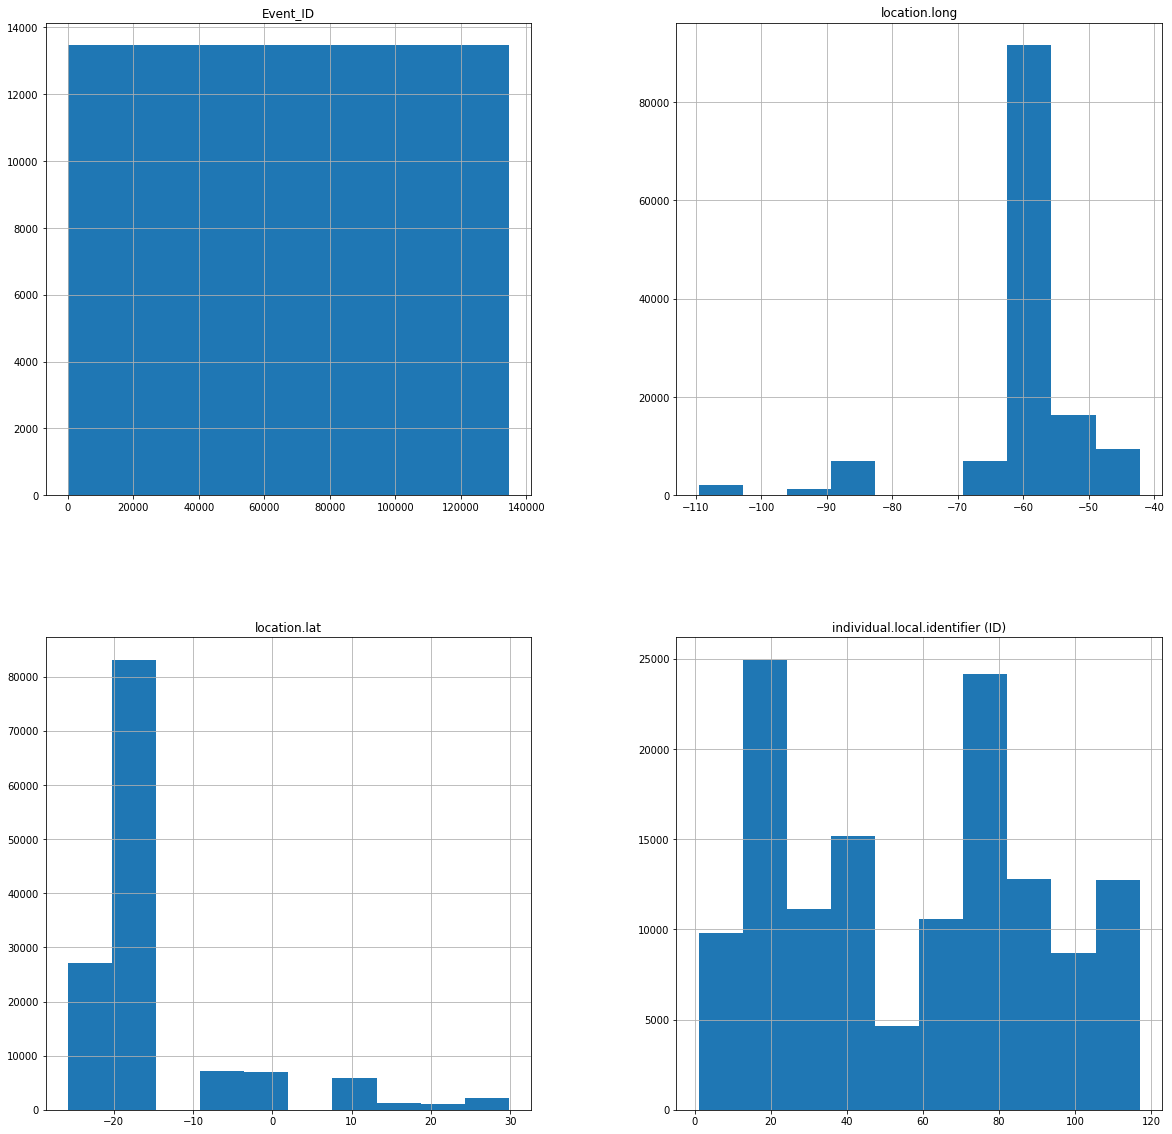

study.name study.name
Jaguar_Taiama                                         39511
jaguar_Oncafari Project                               18906
Sao Bento                                              8705
Jaguar Conservation in Argentina                       8634
Dry Chaco                                              8195
Jaguar Conservation in the Caatinga Biome              6951
Jaguar_Mamiraua                                        6911
Costa Rica                                             5924
Humid Chaco                                            5436
Atlantic forest                                        4408
IOP                                                    3946
Panthera_Pantanal-Jaguar-Project                       3844
Paraguayan Pantanal                                    2994
Jaguars' Movement Pattern in a fragmente landscape     2432
jaguar of sonora                                       2193
Jaguar Conservation in the Atlantic Forest             1991
Greater Lacandona 

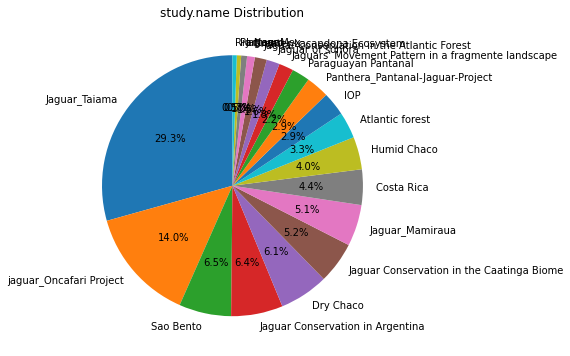

country country
Brazil        94071
Paraguay      21760
Argentina      8469
Costa Rica     5924
Mexico         4466
Name: count, dtype: int64


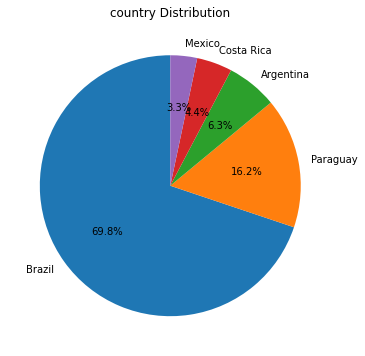

In [9]:
# Histogram to check for single value columns to remove
jaguar_data.hist(figsize=(20,20))
plt.show()

# Pie Chart Distrubtion for non numeric cols
for col in jaguar_data.select_dtypes(include='object').columns:
    if col !='timestamp' and col !='tag.local.identifier':
        counts = jaguar_data[col].value_counts()
        print(col, counts)
        plt.figure(figsize=(8, 6), facecolor='white')
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f"{col} Distribution")  # f-string for string formatting
        plt.show()

In [10]:
jaguar_info_original.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,117.0,59.000000,33.919021,1.0,30.0,59.00,88.0,117.0
Estimated Age,115.0,5.772174,2.466568,0.8,4.0,6.00,7.5,11.0
Weight,108.0,74.712037,25.007370,22.0,55.0,70.75,93.5,130.0


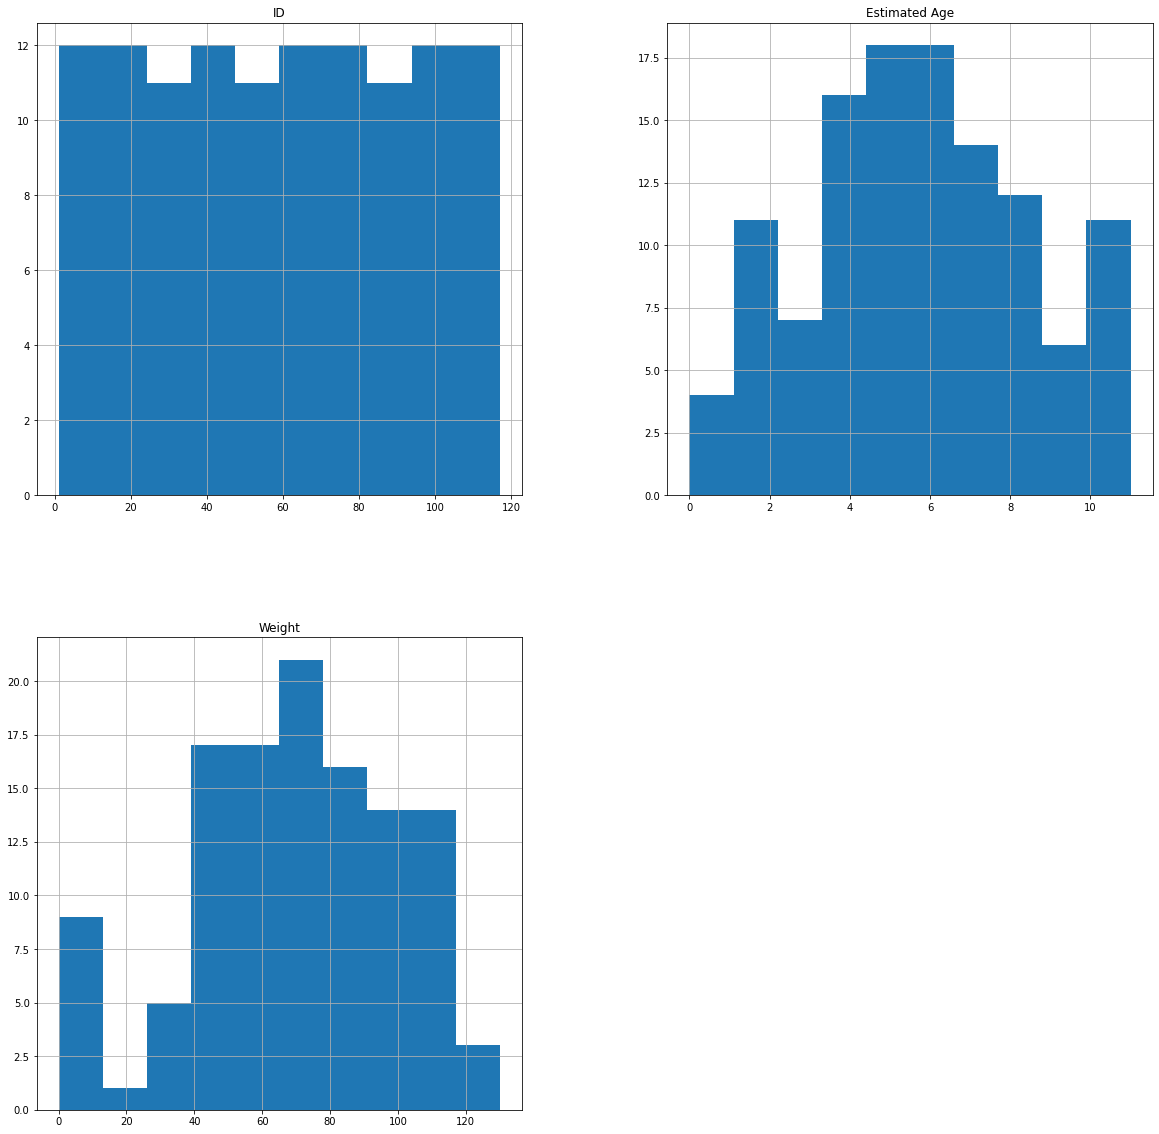

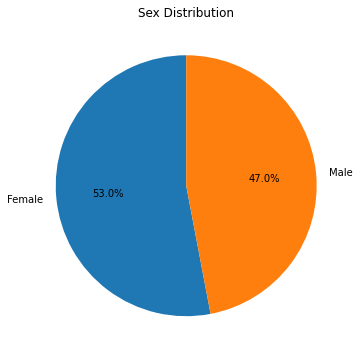

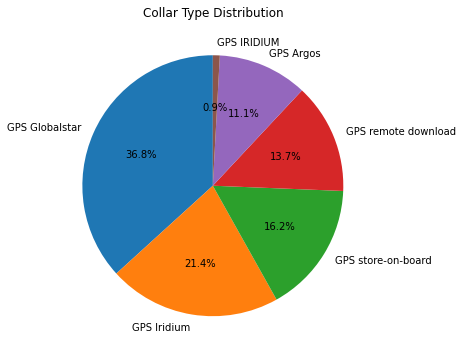

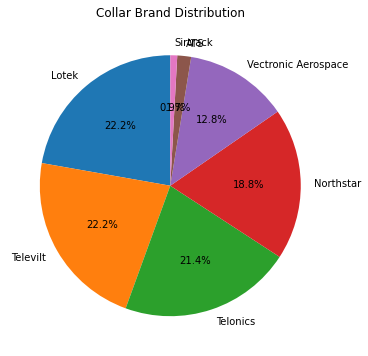

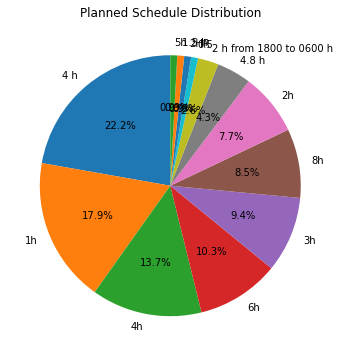

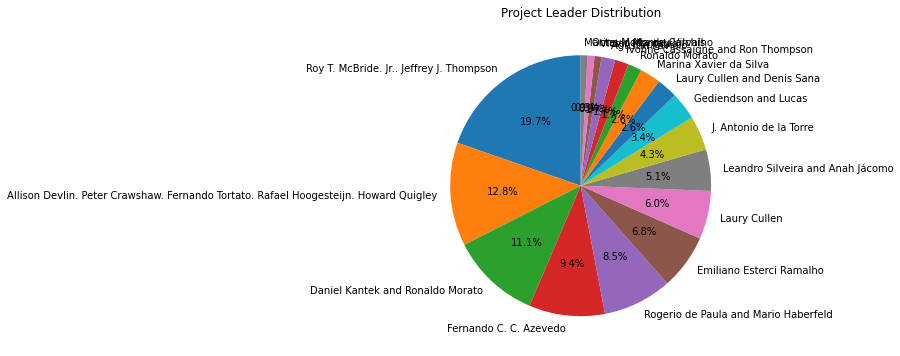

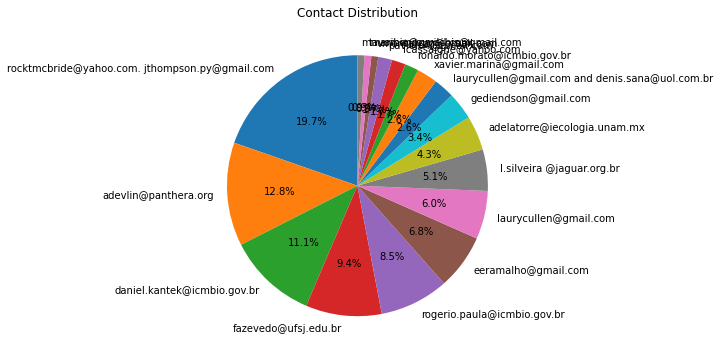

In [11]:
# Histogram to check for single value columns to remove
jaguar_info.hist(figsize=(20,20))
plt.show()

# Pie Chart Distrubtion for non numeric cols
for col in jaguar_info.select_dtypes(include='object').columns:
        counts = jaguar_info[col].value_counts()
        plt.figure(figsize=(8, 6), facecolor='white')
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f"{col} Distribution")  # f-string for string formatting
        plt.show()

['study.name', 'country']
        Event_ID  location.long  location.lat  \
0            1.0     -58.030128    -23.326947   
1            2.0     -58.030643    -23.328427   
2            3.0     -58.030472    -23.327311   
3            4.0     -58.027983    -23.309952   
4            5.0     -58.027747    -23.310006   
...          ...            ...           ...   
134685  134686.0     -57.488719    -16.901141   
134686  134687.0     -57.488709    -16.901154   
134687  134688.0     -57.488766    -16.901114   
134688  134689.0     -57.477037    -16.898847   
134689  134690.0     -57.484627    -16.907812   

        individual.local.identifier (ID)  study.name_Costa Rica  \
0                                      1                  False   
1                                      1                  False   
2                                      1                  False   
3                                      1                  False   
4                                      1          

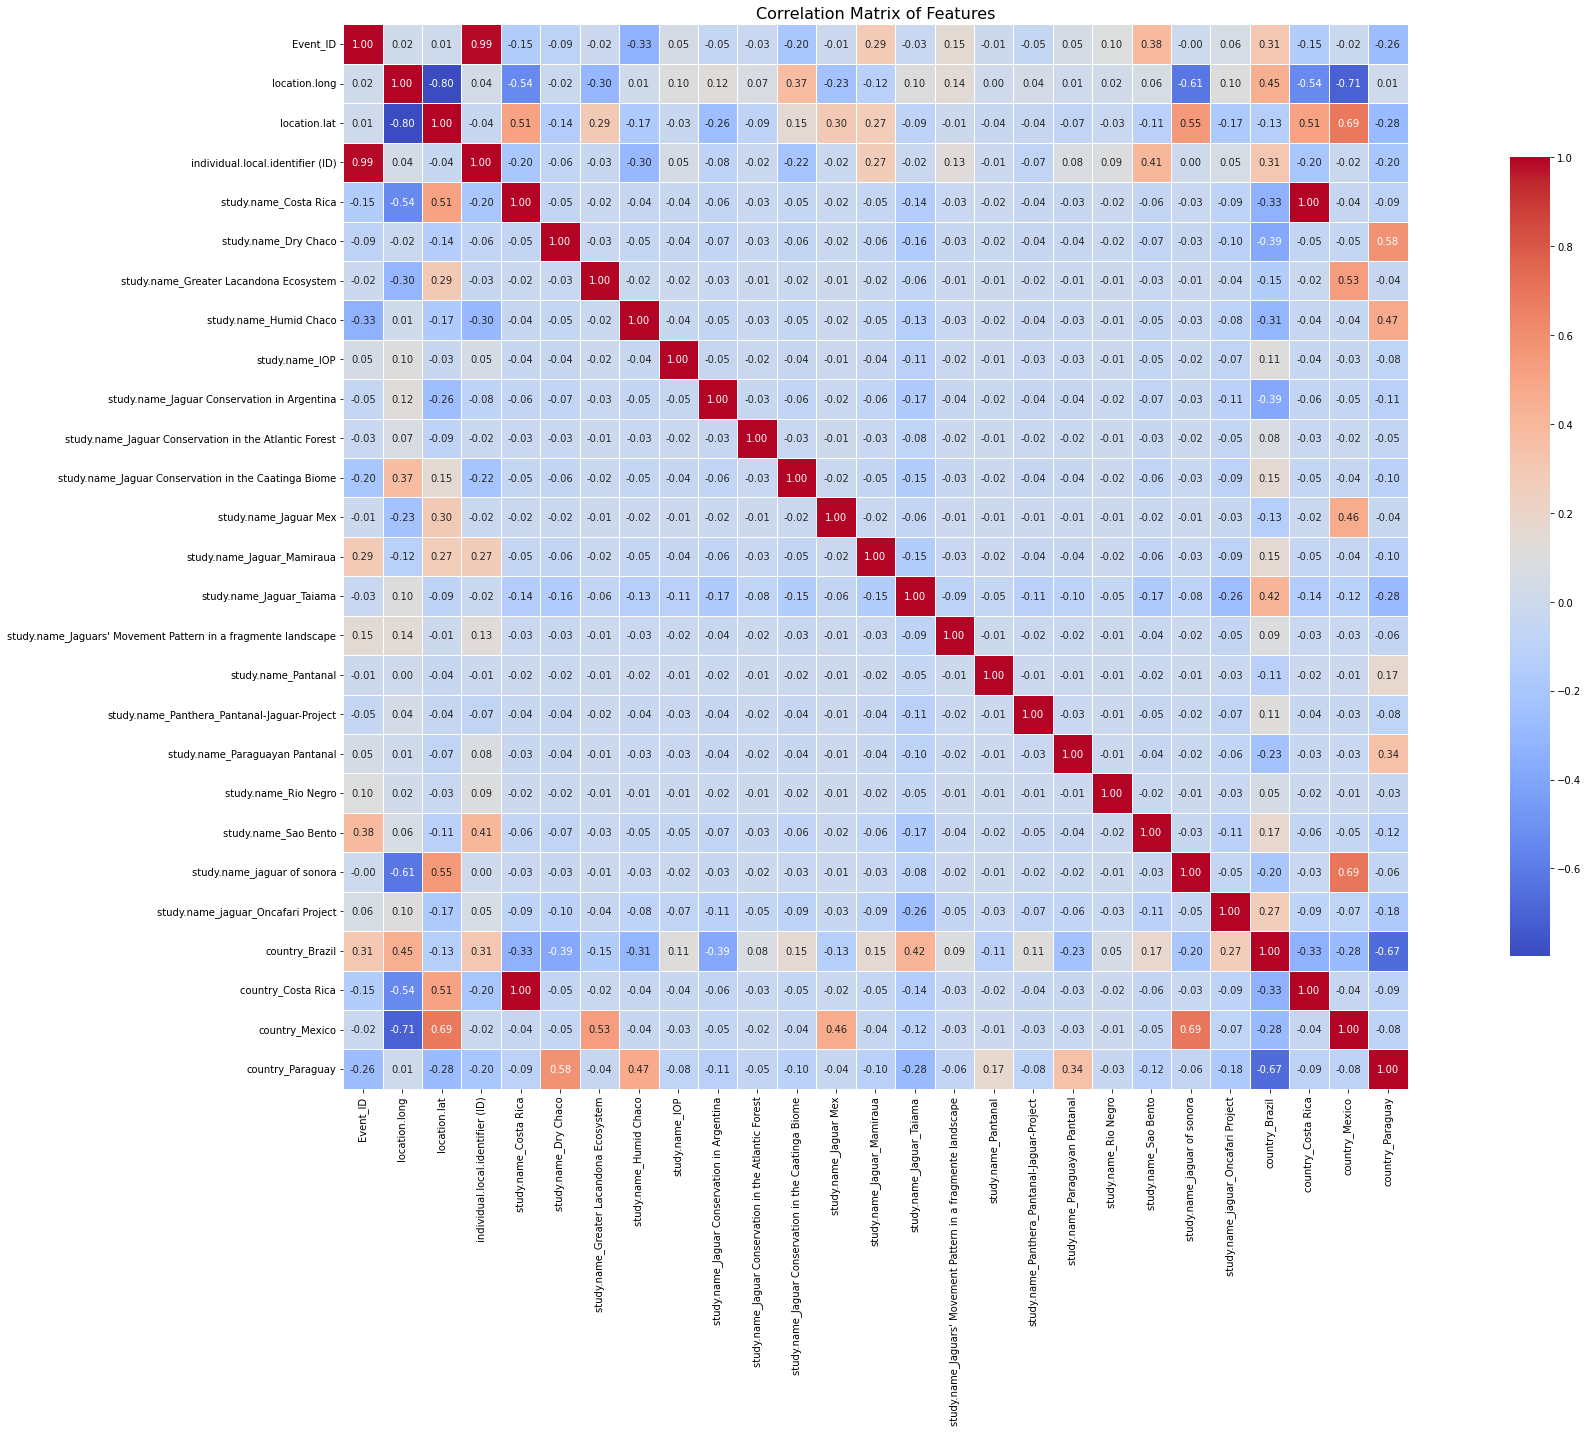

In [12]:
X = jaguar_data.drop(columns=['timestamp', 'tag.local.identifier'])
categorical_cols = X.select_dtypes(include=[object]).columns.tolist()

print(categorical_cols)

corr = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(corr)
corr = corr.astype(int)
print(corr)

correlation_matrix = corr.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, 
            cbar_kws={"shrink": .75}, linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.show()

TEMPORAL ANALYSIS

<ipython-input-13-01f1a9a93811>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  jaguar_data['timestamp'] = pd.to_datetime(jaguar_data['timestamp'], errors='coerce')


datetime64[ns]


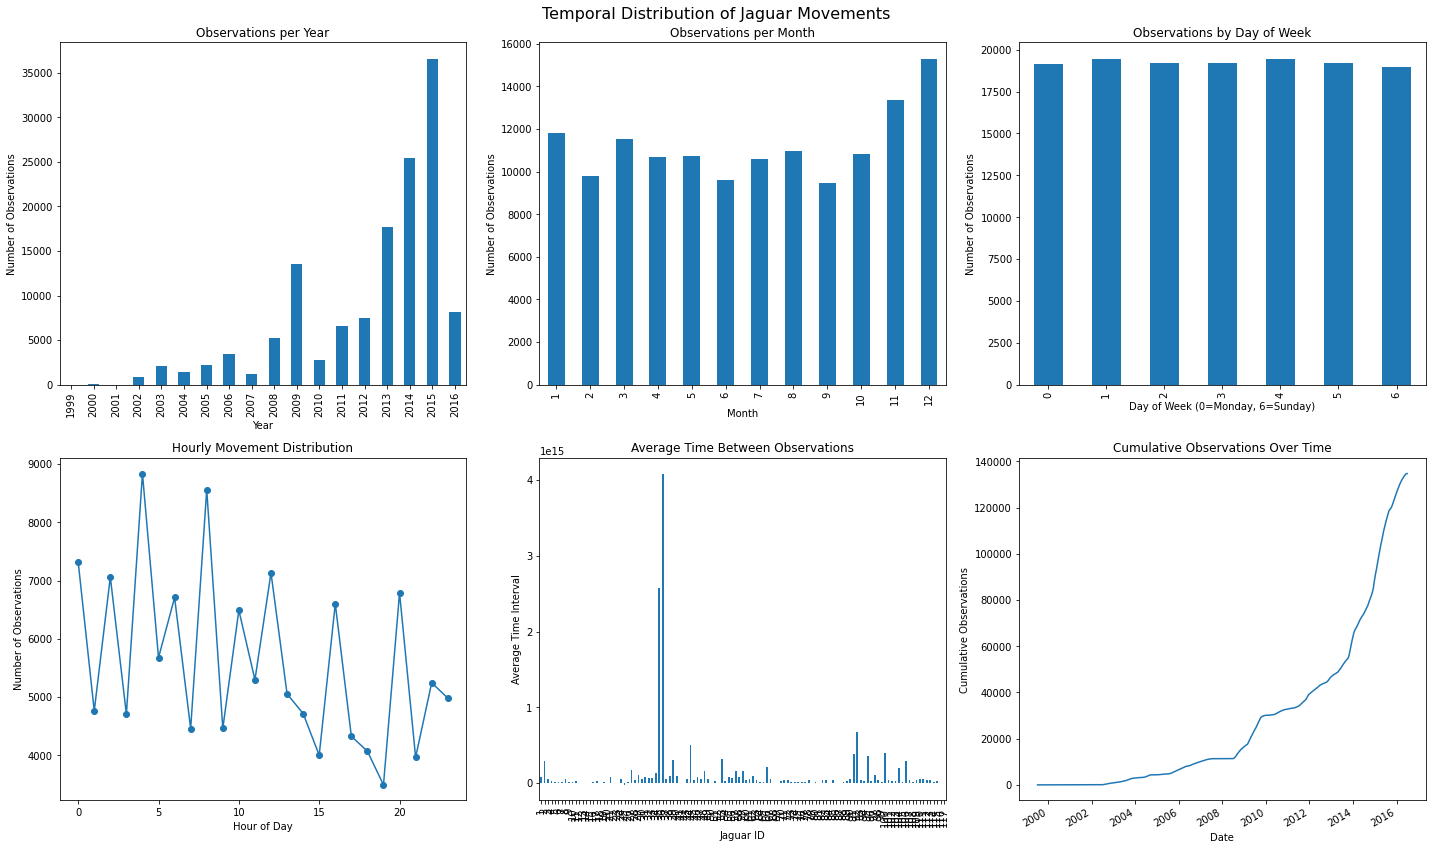


Temporal Analysis Insights:
Total Observation Period: 1999-07-10 13:00:00 to 2016-06-24 00:08:00
Total Observations: 134690
Number of Individual Jaguars: 117


In [13]:
jaguar_data['timestamp'] = pd.to_datetime(jaguar_data['timestamp'], errors='coerce')

# Check if conversion was successful
print(jaguar_data['timestamp'].dtype)

# Remove any rows with invalid timestamps if needed
jaguar_data = jaguar_data.dropna(subset=['timestamp'])

# Proceed with time decomposition
jaguar_data['year'] = jaguar_data['timestamp'].dt.year
jaguar_data['month'] = jaguar_data['timestamp'].dt.month
jaguar_data['day'] = jaguar_data['timestamp'].dt.day
jaguar_data['hour'] = jaguar_data['timestamp'].dt.hour
jaguar_data['day_of_week'] = jaguar_data['timestamp'].dt.dayofweek

# Visualization Subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Temporal Distribution of Jaguar Movements', fontsize=16)

# Observations by Year
yearly_counts = jaguar_data.groupby('year').size()
yearly_counts.plot(kind='bar', ax=axes[0,0], title='Observations per Year')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Number of Observations')

# Observations by Month
monthly_counts = jaguar_data.groupby('month').size()
monthly_counts.plot(kind='bar', ax=axes[0,1], title='Observations per Month')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Number of Observations')

# Observations by Day of Week
day_of_week_counts = jaguar_data.groupby('day_of_week').size()
day_of_week_counts.plot(kind='bar', ax=axes[0,2], title='Observations by Day of Week')
axes[0,2].set_xlabel('Day of Week (0=Monday, 6=Sunday)')
axes[0,2].set_ylabel('Number of Observations')

# Hourly Movement Distribution
hourly_counts = jaguar_data.groupby('hour').size()
hourly_counts.plot(kind='line', marker='o', ax=axes[1,0], title='Hourly Movement Distribution')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Number of Observations')

# Time between observations for each jaguar
def time_between_observations(group):
    return group['timestamp'].diff().mean()

observation_intervals = jaguar_data.groupby('individual.local.identifier (ID)').apply(time_between_observations)
observation_intervals.plot(kind='bar', ax=axes[1,1], title='Average Time Between Observations')
axes[1,1].set_xlabel('Jaguar ID')
axes[1,1].set_ylabel('Average Time Interval')

# Cumulative observations over time
cumulative_obs = jaguar_data.groupby('timestamp').size().cumsum()
cumulative_obs.plot(ax=axes[1,2], title='Cumulative Observations Over Time')
axes[1,2].set_xlabel('Date')
axes[1,2].set_ylabel('Cumulative Observations')

plt.tight_layout()
plt.show()

# Additional Temporal Insights
print("\nTemporal Analysis Insights:")
print(f"Total Observation Period: {jaguar_data['timestamp'].min()} to {jaguar_data['timestamp'].max()}")
print(f"Total Observations: {len(jaguar_data)}")
print(f"Number of Individual Jaguars: {jaguar_data['individual.local.identifier (ID)'].nunique()}")
    

GEOSPACIAL ANALYSIS

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117]
     Event_ID           timestamp  location.long  location.lat  \
0         1.0 2010-06-15 22:43:00     -58.030128    -23.326947   
1         2.0 2010-06-16 02:52:00     -58.030643    -23.328427   
2         3.0 2010-06-16 22:36:00     -58.030472    -23.327311   
3         4.0 2010-06-17 16:42:00     -58.027983    -23.309952   
4         5.0 2010-06-17 20:37:00     -58.027747    -23.310006   
..        ...                 ...            ...           ...   
283     284.0 2011-02-10 06:50:00     -58.095682    -23.262638

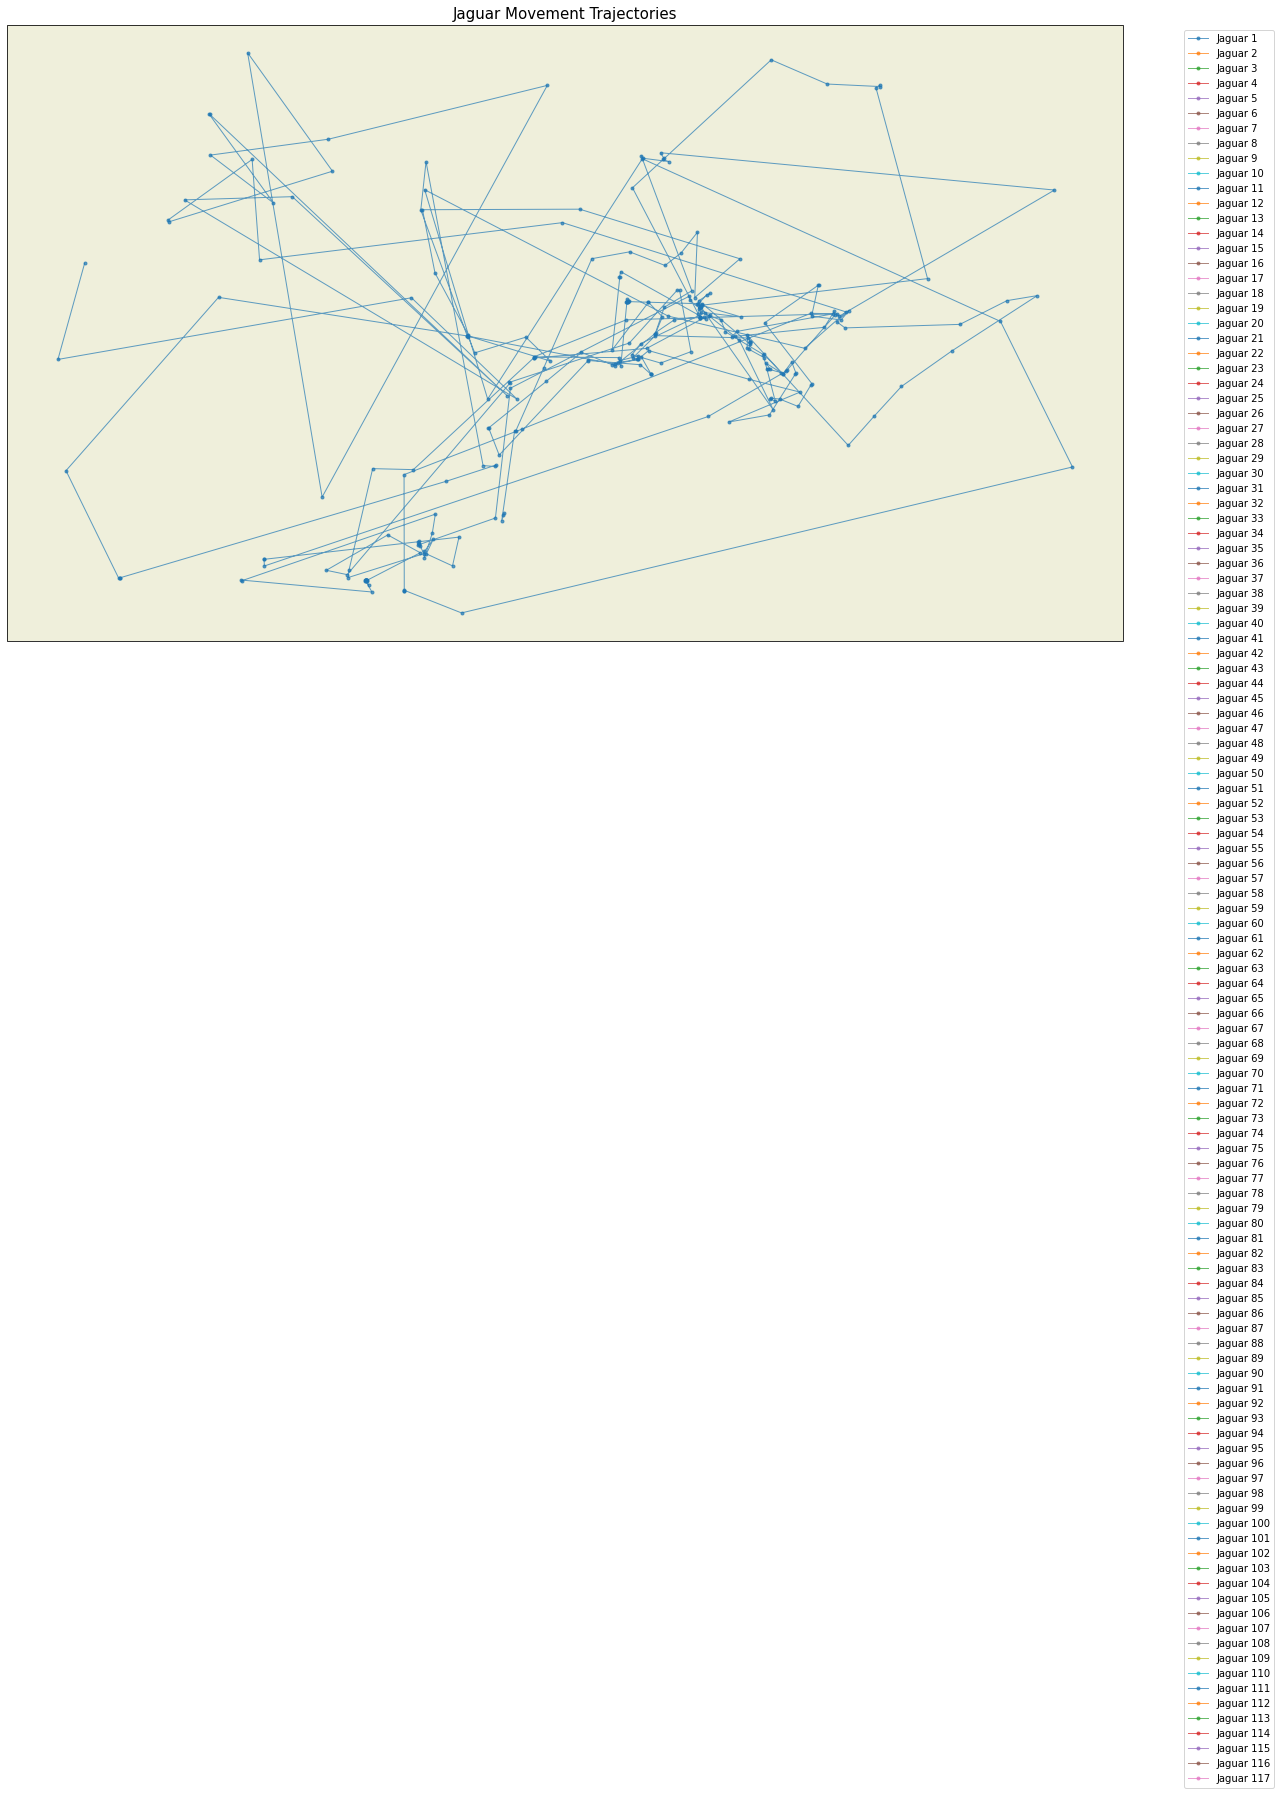

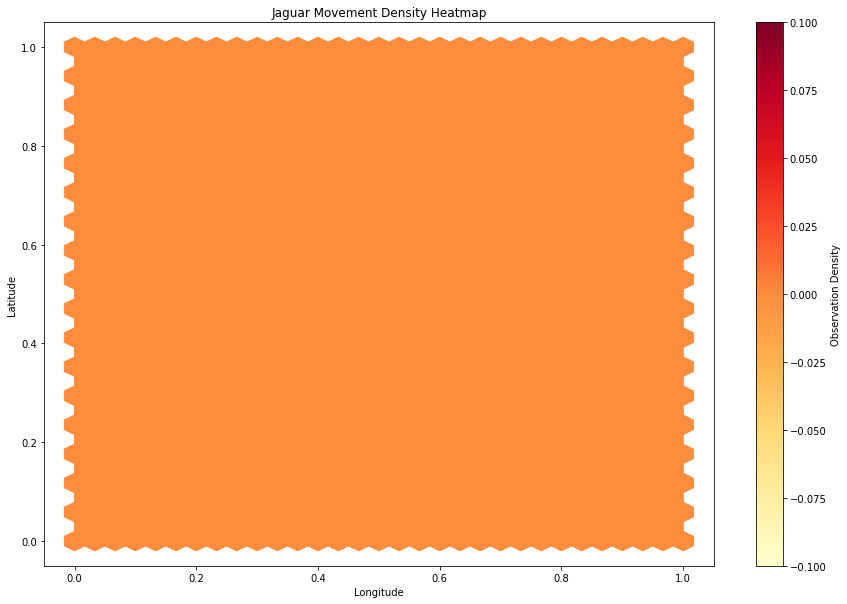

In [14]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot individual jaguar trajectories
print(jaguar_data['individual.local.identifier (ID)'].unique())
for jaguar_id in jaguar_data['individual.local.identifier (ID)'].unique():
    jaguar_data = jaguar_data[jaguar_data['individual.local.identifier (ID)'] == jaguar_id]
    print(jaguar_data)
    # Plot trajectory
    ax.plot(jaguar_data['location.long'], 
            jaguar_data['location.lat'], 
            marker='o', 
            markersize=3, 
            linewidth=1, 
            alpha=0.7,
            label=f'Jaguar {jaguar_id}')

# Set title and adjust plot
plt.title('Jaguar Movement Trajectories', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Compute and annotate spatial statistics
longitude_stats = jaguar_data['location.long'].describe()
latitude_stats = jaguar_data['location.lat'].describe()

print("\nGeospatial Analysis Insights:")
print("\nLongitude Statistics:")
print(longitude_stats)
print("\nLatitude Statistics:")
print(latitude_stats)

# Compute home range (very basic approximation)
min_long, max_long = longitude_stats['min'], longitude_stats['max']
min_lat, max_lat = latitude_stats['min'], latitude_stats['max']

print(f"\nApproximate Movement Area:")
print(f"Longitude Range: {min_long:.4f}° to {max_long:.4f}°")
print(f"Latitude Range: {min_lat:.4f}° to {max_lat:.4f}°")

# Optional: Density heatmap
plt.figure(figsize=(15, 10))
plt.hexbin(jaguar_data['location.long'], 
           jaguar_data['location.lat'], 
           gridsize=30, 
           cmap='YlOrRd')
plt.colorbar(label='Observation Density')
plt.title('Jaguar Movement Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Check for number of unique date latitude longitude groups

In [15]:
group_copy = jaguar_data_original.copy()
group_copy['timestamp'] = pd.to_datetime(group_copy['timestamp'])
    
# Convert timestamp to date only (removing time component)
group_copy['date'] = group_copy['timestamp'].dt.date

# Create location groups
location_groups = group_copy.groupby(['date', 'location.lat', 'location.long']).size().reset_index(name='count')

# Calculate summary statistics
stats = {
    'total_observations': len(group_copy),
    'unique_locations': len(location_groups),
    'unique_dates': group_copy['date'].nunique(),
    'avg_locations_per_day': len(location_groups) / group_copy['date'].nunique(),
    'locations_by_date': location_groups.groupby('date').size().describe()
}

# Print results
print("\nLocation Analysis Summary:")
print(f"Total observations: {stats['total_observations']:,}")
print(f"Unique date-location combinations: {stats['unique_locations']:,}")
print(f"Number of unique dates: {stats['unique_dates']:,}")
print(f"Average unique locations per day: {stats['avg_locations_per_day']:.2f}")
print("\nDaily unique locations statistics:")
print(stats['locations_by_date'])

<ipython-input-15-94fe4c12dee8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_copy['timestamp'] = pd.to_datetime(group_copy['timestamp'])



Location Analysis Summary:
Total observations: 134,690
Unique date-location combinations: 134,062
Number of unique dates: 4,633
Average unique locations per day: 28.94

Daily unique locations statistics:
count    4633.000000
mean       28.936326
std        35.217018
min         1.000000
25%         6.000000
50%        13.000000
75%        39.000000
max       224.000000
dtype: float64
